# Disease Prediction using Machine Learning
This model aims to implement a robust machine-learning model that can efficiently predict the disease of a human based on the symptoms that he/she has.

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

%matplotlib inline

## Dataset:
The train dataset contains 133 columns, in which 132 columns represent symptoms and the last column is the prognosis.
- First, we should drop the null columns from the dataset to clean it.
- We should check whether our target column is balanced or not. For that, we are using a bar plot.

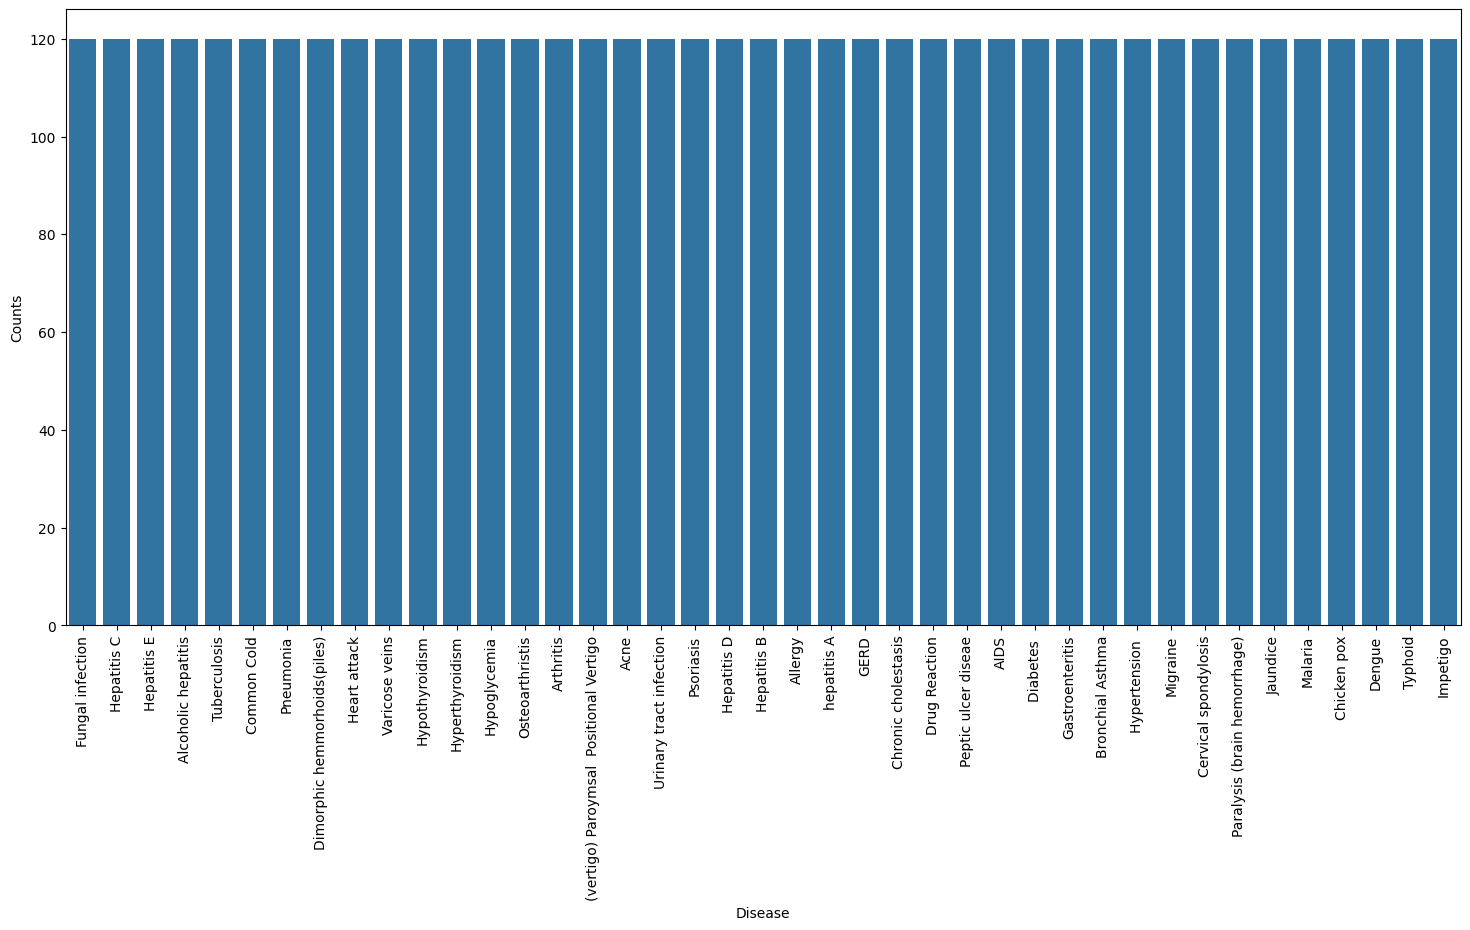

In [2]:
Data_path = "Training.csv"
data = pd.read_csv(Data_path).dropna(axis=1) # To drop null columns

disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation = 90) # makes labels on the bar graph vertical
plt.show()

Now, we know that the dataset that was given is a balanced dataset (Exactly 120 samples for each disease), no further balancing is required.
- Our target column (prognosis) is of object datatype which is not suitable to train our machine learning model. So, we are converting the values in that column to numerical values using Label Encoder.

In [3]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

## Test-Train splitting the data
- We will be splitting the data in 80:20 format i.e., 80% data for training, 20% data for evaluation (testing).

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


## Model Building
- We will use K-Fold cross-validation to evaluate the machine-learning models. For cross-validation, we use Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier.

In [5]:
# Cross-validation scoring
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1, scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0


The above mean scores of our machine learning algorithms are pretty high, our algorithms are working well.
- To build a robust model, we should minimize our error as much as possible.
- For that, we can take the mode of the predictions of all three models so that even one of the models made a mistake, the other two may correct it.
## Building classifier by combining all models

Accuracy on train data by SVM classifier    : 100.0%
Accuracy on test data by SVM classifier    : 100.0


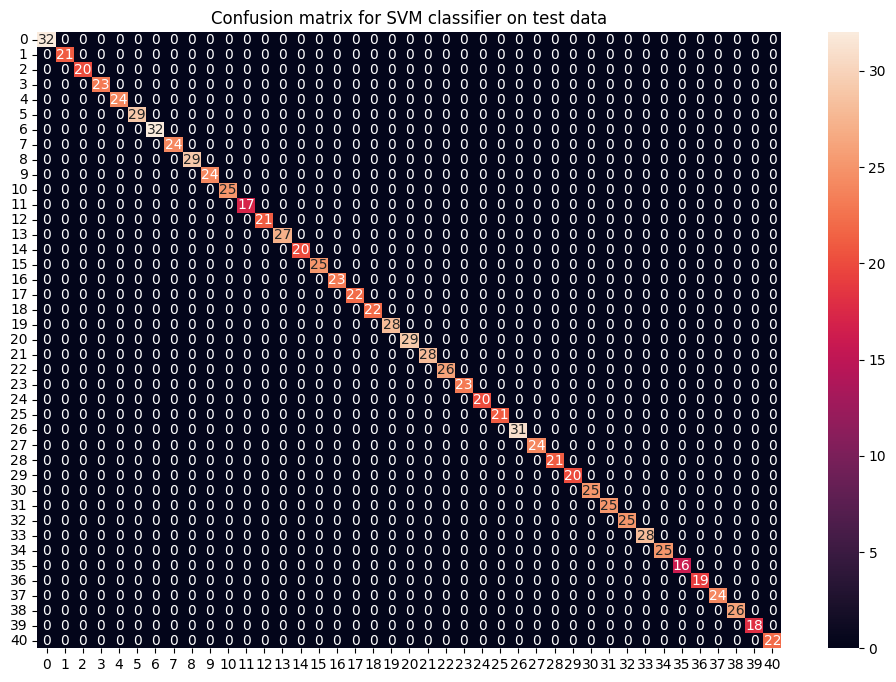

In [6]:
# Train & test using SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
print(f"Accuracy on train data by SVM classifier\
    : {accuracy_score(y_train, svm_model.predict(X_train))*100}%")
print(f"Accuracy on test data by SVM classifier\
    : {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix for SVM classifier on test data")
plt.show()

Accuracy on train data by NB classifier    : 100.0%
Accuracy on test data by NB classifier    : 100.0%


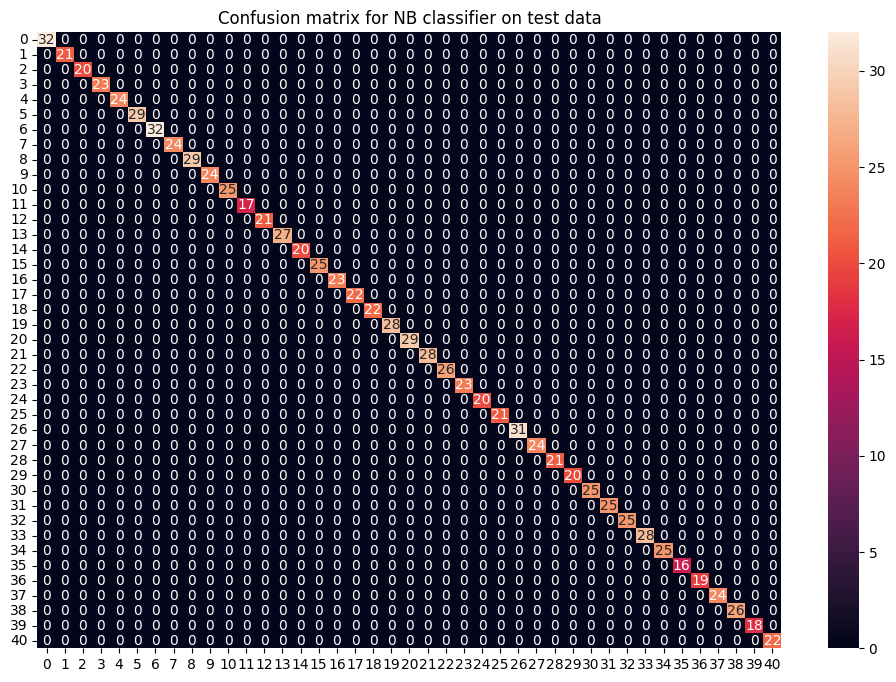

In [7]:
# Train & test using Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by NB classifier\
    : {accuracy_score(y_train, nb_model.predict(X_train))*100}%")
print(f"Accuracy on test data by NB classifier\
    : {accuracy_score(y_test, preds)*100}%")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix for NB classifier on test data")
plt.show()

Accuracy on train data by Random Forest classifier    : 100.0%
Accuracy on test data by Random Forest classifier    : 100.0%


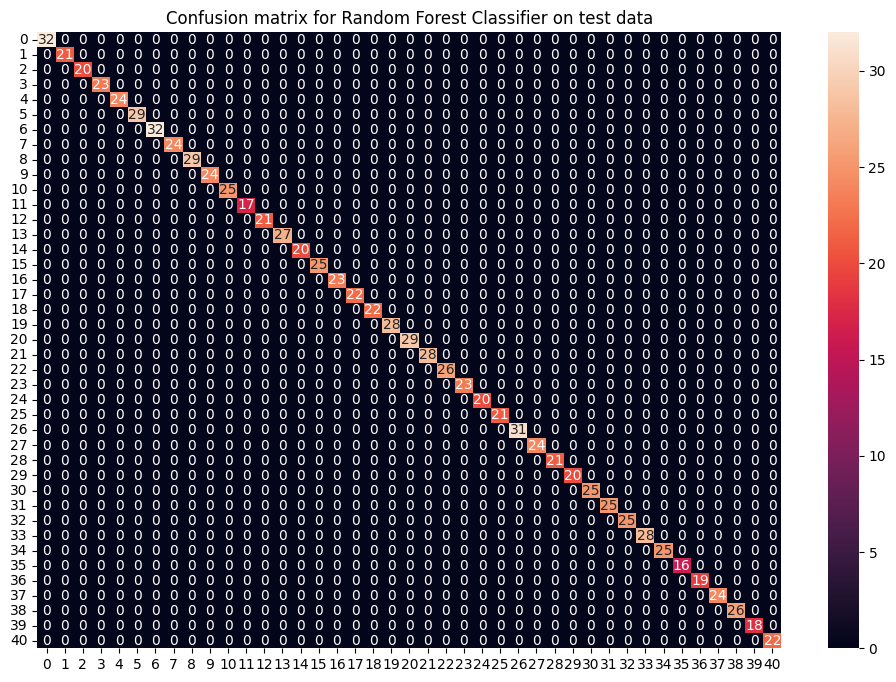

In [8]:
# Train & test using Random Forest classifier
rfc_model = RandomForestClassifier(random_state=18)
rfc_model.fit(X_train, y_train)
preds = rfc_model.predict(X_test)
print(f"Accuracy on train data by Random Forest classifier\
    : {accuracy_score(y_train, rfc_model.predict(X_train))*100}%")
print(f"Accuracy on test data by Random Forest classifier\
    : {accuracy_score(y_test, preds)*100}%")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix for Random Forest Classifier on test data")
plt.show()

From the above heat maps of confusion matrix, we can say that the models are performing well on the unseen data. Now, we will train our models using the whole training data and test them on our test data.

Accuracy on Test dataset by the combined model    : 100.0%


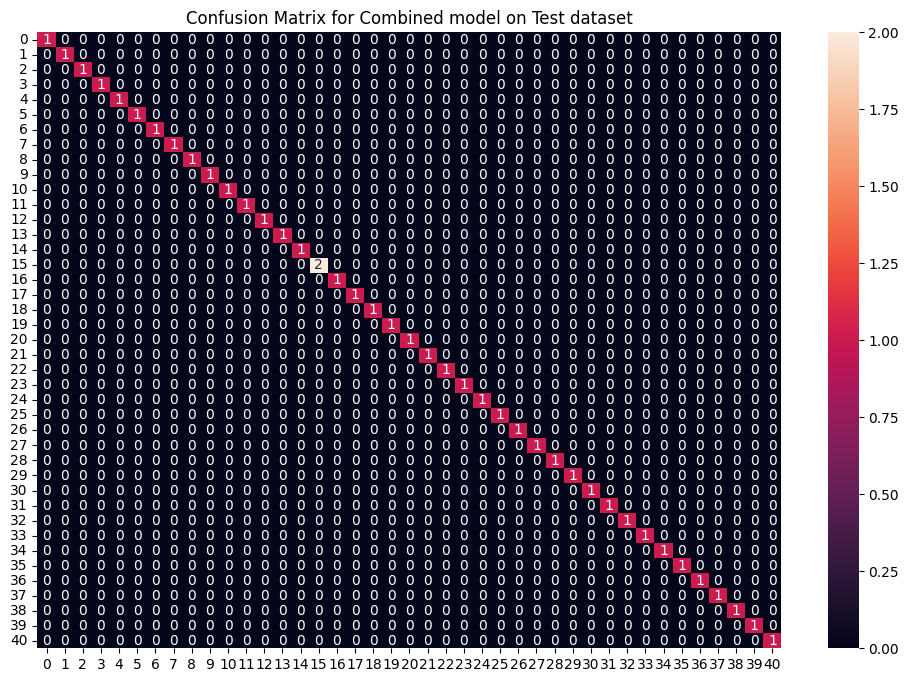

In [9]:
# Training on the whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rfc_model = RandomForestClassifier(random_state = 18)
final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rfc_model.fit(X,y)

test_data = pd.read_csv("Testing.csv").dropna(axis = 1)

test_X = test_data.iloc[:, :-1]
test_y = encoder.fit_transform(test_data.iloc[:, -1])

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rfc_preds = final_rfc_model.predict(test_X)

final_preds = [mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rfc_preds)]

print(f"Accuracy on Test dataset by the combined model\
    : {accuracy_score(test_y, final_preds)*100}%")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined model on Test dataset")
plt.show()

Now, we will create a funciton which takes symptoms of a patient as input and give the predicted disease as the output.
## Creating the prediction function

In [18]:
symptoms = X.columns.values

symptoms_index = {}

for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptoms_index[symptom] = index

data_dict = {
    "symptom_index": symptoms_index,
    "predictions_classes": encoder.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)

    rf_prediction = data_dict["predictions_classes"][final_rfc_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    pred_list = [rf_prediction, nb_prediction, svm_prediction]
    final_prediction = Counter(pred_list).most_common(1)[0][0]

    predictions = {
        "rf_model_prediction": rf_prediction,
        "nb_model_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'nb_model_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


c:\Users\KARTHIKEYA VEEBHUTHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\KARTHIKEYA VEEBHUTHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\KARTHIKEYA VEEBHUTHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
